In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import cv2
from skimage.transform import resize

folders=['daisy','dandelion','rose','sunflower','tulip']
x=[]
y=[]

In [ ]:
for folder in folders:
  path="/content/drive/MyDrive/flowers/"+folder+"/*.jpg"
  files=glob.glob(pathname=path)
  #print(files)
  for myfile in files:
    image=cv2.imread(myfile)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=resize(image,(128,128,3))
    x.append(image)
    y.append(folder)


(-0.5, 127.5, 127.5, -0.5)

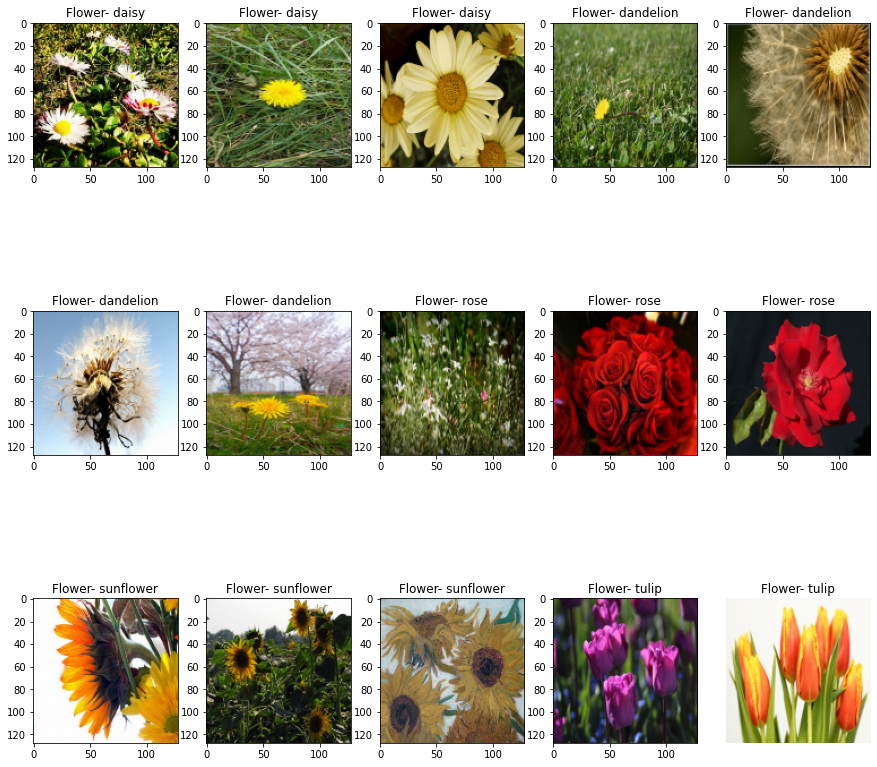

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(3,5)
fig.set_size_inches(15,15)

#plt.subplots_adjust(wspace=0.7,hspace=0.7)
k=0

for i in range(3):
  for j in range(5):
    plt.axis('off')
    ax[i,j].imshow(x[k*265])
    ax[i,j].set_title('Flower- '+y[k*265])
    k=k+1
plt.axis('off')    
    

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
yenc=enc.fit_transform(y)

In [ ]:
yenc.astype
enc.inverse_transform([1])

array(['dandelion'], dtype='<U9')

In [ ]:
for i in range(5):
  print('FLower- '+y[i*1000])
  #print('encoded - '+yenc[i*1000])
  print(yenc[i*1000])


FLower- daisy
0
FLower- dandelion
1
FLower- rose
2
FLower- sunflower
3
FLower- tulip
4


In [ ]:
from keras.utils import to_categorical
ycate=to_categorical(yenc)

In [ ]:
for i in range(5):
  print('FLower- '+y[i*1000])
  #print('encoded - '+yenc[i*1000])
  print(yenc[i*1000])
  print(ycate[i*1000])

FLower- daisy
0
[1. 0. 0. 0. 0.]
FLower- dandelion
1
[0. 1. 0. 0. 0.]
FLower- rose
2
[0. 0. 1. 0. 0.]
FLower- sunflower
3
[0. 0. 0. 1. 0.]
FLower- tulip
4
[0. 0. 0. 0. 1.]


In [ ]:
import numpy as np
Xnew=np.array(x)/255  #image to matrix and /255

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,ycate,test_size=0.3,random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,MaxPool2D
from tensorflow.keras import layers


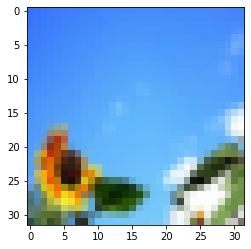

In [ ]:
len(xtrain)
im=xtrain[1]
im1=resize(im,(32,32,3))
plt.imshow(im1*255)

In [ ]:
x1train=[]
for i in range(len(xtrain)):
  imag=resize(xtrain[i],(32,32,3))
  x1train.append(imag)

(3026, 32, 32, 3)

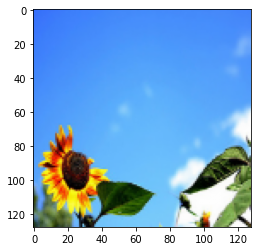

In [ ]:
plt.imshow(x1train[1]*255)
plt.imshow(xtrain[1]*255)
x1tra=np.array(x1train)
x1tra.shape

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
cnn.add(Dropout(rate = 0.2))
cnn.add(Conv2D(filters = 64, kernel_size = (3, 3)))
cnn.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
cnn.add(Dropout(rate = 0.2))
cnn.add(Flatten())
cnn.add(Dense(units = 5, activation = 'softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

In [ ]:
history=cnn.fit(x1tra,ytrain,batch_size=25,epochs=300,validation_split=0.2)

Epoch 1/300
97/97 [==============================] - 4s 36ms/step - loss: 1.6055 - accuracy: 0.2453 - val_loss: 1.5967 - val_accuracy: 0.2492
Epoch 2/300
97/97 [==============================] - 4s 43ms/step - loss: 1.5961 - accuracy: 0.2310 - val_loss: 1.5853 - val_accuracy: 0.2492
Epoch 3/300
97/97 [==============================] - 3s 33ms/step - loss: 1.5811 - accuracy: 0.2469 - val_loss: 1.5347 - val_accuracy: 0.3449
Epoch 4/300
97/97 [==============================] - 3s 33ms/step - loss: 1.5284 - accuracy: 0.3247 - val_loss: 1.4810 - val_accuracy: 0.3317
Epoch 5/300
97/97 [==============================] - 3s 33ms/step - loss: 1.4757 - accuracy: 0.3554 - val_loss: 1.4320 - val_accuracy: 0.3680
Epoch 6/300
97/97 [==============================] - 3s 33ms/step - loss: 1.4430 - accuracy: 0.3652 - val_loss: 1.3720 - val_accuracy: 0.4257
Epoch 7/300
97/97 [==============================] - 3s 33ms/step - loss: 1.3912 - accuracy: 0.4055 - val_loss: 1.3011 - val_accuracy: 0.4736
Epoch 

In [ ]:
testx=[]
for i in range(len(xtest)):
  imag=resize(xtest[i],(32,32,3))
  testx.append(imag)

test=np.array(testx)
test.shape

(1297, 32, 32, 3)

In [ ]:

cnn.evaluate(test,ytest)

41/41 [==============================] - 0s 12ms/step - loss: 1.0823 - accuracy: 0.5544


[1.082295536994934, 0.5543562173843384]

In [ ]:
cnn.evaluate(test,ytest)

41/41 [==============================] - 0s 11ms/step - loss: 1.0823 - accuracy: 0.5544


[1.082295536994934, 0.5543562173843384]

In [ ]:
cnn.evaluate(test,ytest) #latest

41/41 [==============================] - 0s 10ms/step - loss: 1.0839 - accuracy: 0.5652


[1.0839062929153442, 0.5651503205299377]

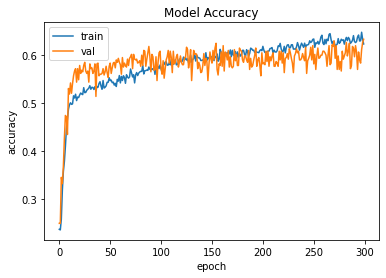

In [ ]:
#latest
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

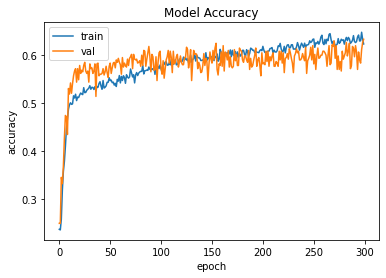

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [ ]:
ypred=cnn.predict(test)
ypreddigit=np.argmax(ypred,axis=1)

In [ ]:
yprob=cnn.predict(np.array(test))


In [ ]:
ypredicted=[]
for f in range(len(ypreddigit)):
  ypredicted.append(str(enc.inverse_transform([ypreddigit[f]])))

In [ ]:
ytest_1=np.argmax(ytest,axis=1)
ytest_2=[]
for h in range(len(ytest_1)):
  ytest_2.append(str(enc.inverse_transform([ytest_1[h]])))


(<Figure size 648x648 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fad6b5e1978>)

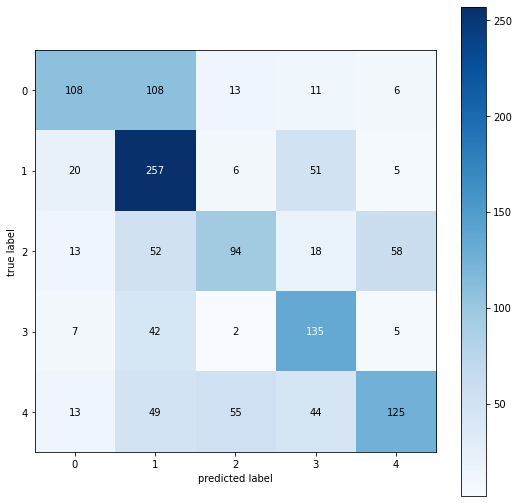

In [ ]:

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(ytest_2,ypredicted)
plot_confusion_matrix(mat,figsize=(9,9),colorbar=True,)

In [ ]:
correct_class=[]
wrong_class=[]
correct_proba=[]
wrong_proba=[]
for i in range(len(ytest)):
  if (np.argmax(ytest[i]))==ypreddigit[i]:
    correct_class.append(i)
    correct_proba.append(i)
    if (len(correct_class)==8):
        break


for j in range(len(ytest)):
  if ((np.argmax(ytest[j]))!=ypreddigit[j]):
    wrong_class.append(j)
    wrong_proba.append(j)
    if len(wrong_class)==8:
        break


In [ ]:
correct_class
wrong_class

[0, 3, 5, 6, 7, 9, 11, 14]

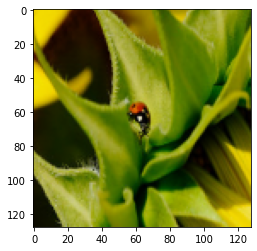

In [ ]:
plt.imshow((xtest[correct_class[4]])*255)

In [ ]:
enc.inverse_transform([1])
print(str(enc.inverse_transform([ypreddigit[correct_class[1]]])))
print(str(enc.inverse_transform([np.argmax(ytest[correct_class[1]])])))
np.argmax(ytest[correct_class[1]])

['dandelion']
['dandelion']


1

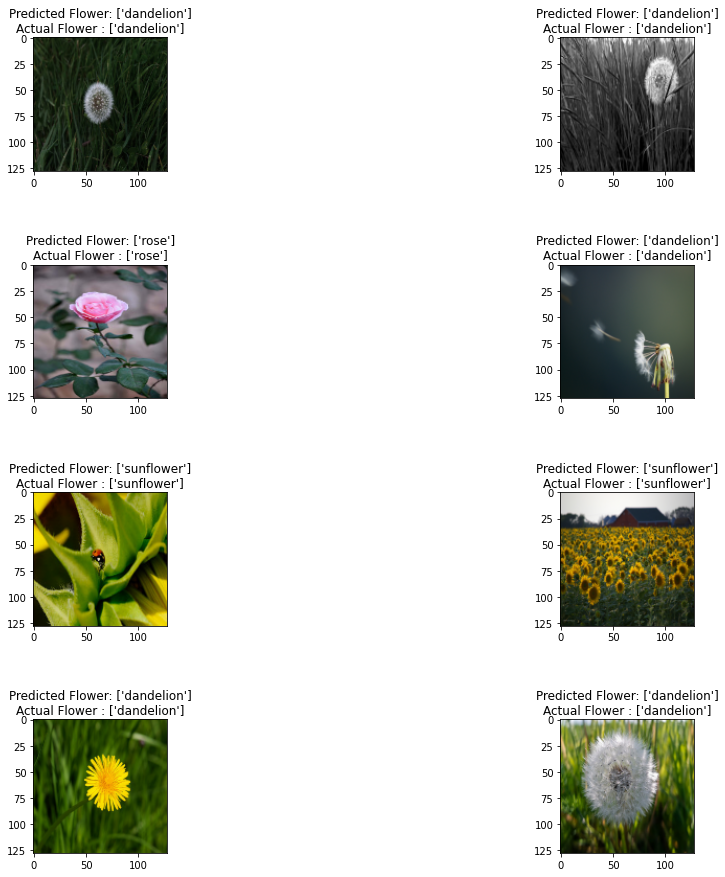

In [ ]:
c=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
plt.subplots_adjust(wspace=0.7,hspace=0.7)
for i in range(4):
  for j in range(2):
    ax[i,j].imshow((xtest[correct_class[c]])*255)
    #ax[i,j].set_title("Predicted -"+str(ypreddigit[correct_class[c]])+" actual -"+str(np.argmax(ytest[correct_class[c]]))+"\n-"+str(yprob[correct_class[c]]))
    ax[i,j].set_title('Predicted Flower: '+str(enc.inverse_transform([ypreddigit[correct_class[c]]]))+'\n'+'Actual Flower : '+str(enc.inverse_transform([np.argmax(ytest[correct_class[c]])])))
    c=c+1


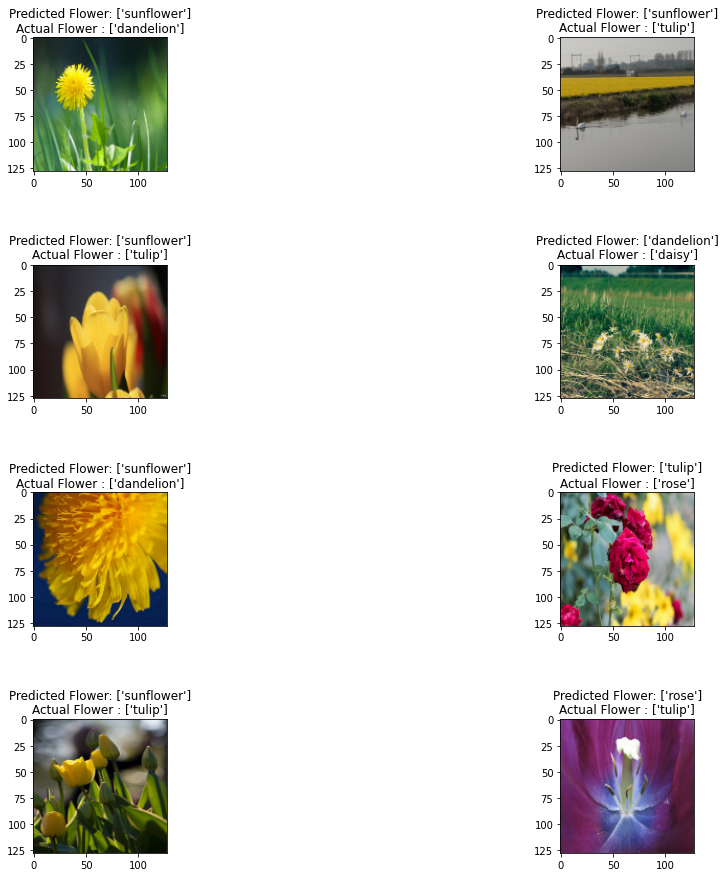

In [ ]:
c=0
#print(enc.inverse_transform(ypreddigit[1]))
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
plt.subplots_adjust(wspace=0.7,hspace=0.7)

for i in range(4):
  for j in range(2):
    ax[i,j].imshow((xtest[wrong_class[c]])*255)
    #ax[i,j].set_title("Predicted -"+str(ypreddigit[wrong_class[c]])+" actual -"+str(np.argmax(ytest[wrong_class[c]]))+"\n-"+str(yprob[wrong_class[c]]))
    ax[i,j].set_title('Predicted Flower: '+str(enc.inverse_transform([ypreddigit[wrong_class[c]]]))+'\n'+'Actual Flower : '+str(enc.inverse_transform([np.argmax(ytest[wrong_class[c]])])))
    c=c+1


In [ ]:
yprob[wrong_class[1]]

array([0.04676088, 0.11548969, 0.00719788, 0.81650585, 0.01404565],
      dtype=float32)

In [ ]:
cnn.save('FlowerClassificaitonv6.h5')

In [ ]:
from keras.models import load_model
 
# load model
model1 = load_model('FlowerClassificaitonv6.h5')
# summarize model.
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

In [ ]:
path1="/content/drive/MyDrive/flowers/sunflower/44079668_34dfee3da1_n.jpg"
file1=glob.glob(pathname=path1)
  
img=cv2.imread('/content/drive/MyDrive/flowers/sunflower/44079668_34dfee3da1_n.jpg',1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

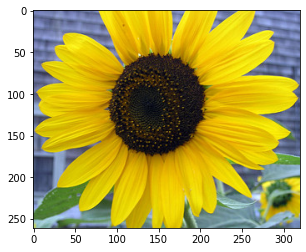

In [ ]:
plt.imshow(img)

In [ ]:
img1=resize(img,(32,32,3))
img1=np.array(img1)/255

In [ ]:
i=cnn.predict(np.array([img1,]))
i  

array([[8.0008409e-04, 3.6927667e-02, 1.1720245e-04, 9.6071279e-01,
        1.4422026e-03]], dtype=float32)

In [ ]:
q=np.argmax(i)
enc.inverse_transform([q])

array(['sunflower'], dtype='<U9')

In [ ]:
cnn.weights

[<tf.Variable 'conv2d_4/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[ 7.98444152e-02,  1.00333750e-01, -1.40576228e-01,
           -8.71582031e-01,  3.00381612e-02, -9.45408046e-02,
            1.88864395e-01,  1.14318550e-01, -3.78069058e-02,
           -1.01603307e-02, -4.44967002e-02,  8.97655264e-03,
            3.38576734e-02,  1.84045155e-02, -1.02372587e-01,
           -1.18109463e-02,  7.91961774e-02,  7.13831410e-02,
           -1.05827034e-01,  2.54222043e-02,  5.81831276e-01,
            1.15985572e-01,  6.03753701e-02, -1.09671444e-01,
            1.15826979e-01, -8.81829709e-02, -3.52215208e-02,
            1.74693707e-02, -5.68909645e-02,  6.17458262e-02,
           -1.38859734e-01,  3.52835469e-02],
          [ 9.66740549e-02,  1.60316434e-02, -1.07372552e-02,
           -4.56986964e-01, -9.49160039e-01,  5.13552576e-02,
           -4.41099435e-01, -1.01429534e+00,  8.73713270e-02,
            4.33064625e-02, -4.18912657e-02, -1.14511721e-01,
          

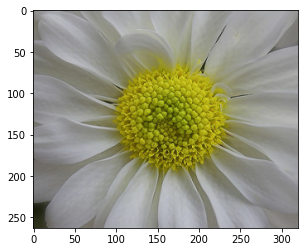

In [ ]:
img=cv2.imread('/content/drive/MyDrive/flowers/daisy/100080576_f52e8ee070_n.jpg',1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
img1=resize(img,(32,32,3))
img1=np.array(img1)/255
i=cnn.predict(np.array([img1,]))
i 

array([[0.07422084, 0.49804768, 0.01023634, 0.40870166, 0.0087935 ]],
      dtype=float32)